# YOLOv5在kitti上的2D目标检测

作者：LZN CRS SZC组

[官方代码查看(点击进入)](https://github.com/ultralytics/yolov5)

[官方代码kaggle实现(点击进入)](https://www.kaggle.com/ultralytics/yolov5/data)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 安装YOLOv5，进入YOLOv5的工作路径下

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.7.0 (Tesla P100-PCIE-16GB)


## 添加kitti图像数据到YOLOv5的检测路径中

In [4]:
%cd ../../
%ls

/kaggle
input/  lib/  working/


In [5]:
%cp input/kitti-object-detection/kitti_single/training/image_2/*.png /kaggle/working/yolov5/data/images/

In [ ]:
%cp input/autopilotvideo/*.mp4 /kaggle/working/yolov5/data/

In [6]:
%cd /kaggle/working/yolov5
%ls

/kaggle/working/yolov5
Dockerfile  __init__.py  hubconf.py         test.py         utils/
LICENSE     data/        models/            train.py        weights/
README.md*  detect.py    requirements.txt*  tutorial.ipynb


## 使用YOLOv5官方预训练模型进行图像内容的检测，默认为coco数据集的分类

针对kitti数据集，主要可以检测出行人，长椅，汽车，自行车等交通主要类别。且精度较高，满足要求。

若需要检测特定物体，在参数中加入--classes 0 1 2 3 等，coco类别如下

names: [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush' ]

参数说明：

    --weights + 检测模型
    --img + 图像大小
    --conf + 后处理置信度
    --source +文件夹路径(默认检测文件夹中所有图像)/单张图像/url地址(图像或者视频的地址)

### 检测文件夹中所有图像，类别为coco所有类别

In [13]:
!python detect.py --weights yolov5x.pt --img 640 --conf 0.25 --source data/images/000100.png

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/images/000100.png', update=False, view_img=False, weights=['yolov5x.pt'])
image 1/1 /kaggle/working/yolov5/data/images/000100.png: 224x640 3 persons, 1 truck, 1 stop sign, 4 potted plants, Done. (0.048s)
Results saved to runs/detect/exp4
Done. (0.091s)


In [ ]:
# 可视化其中1张
Image(filename=('/kaggle/working/yolov5/runs/detect/exp/000000.png'), width=600)

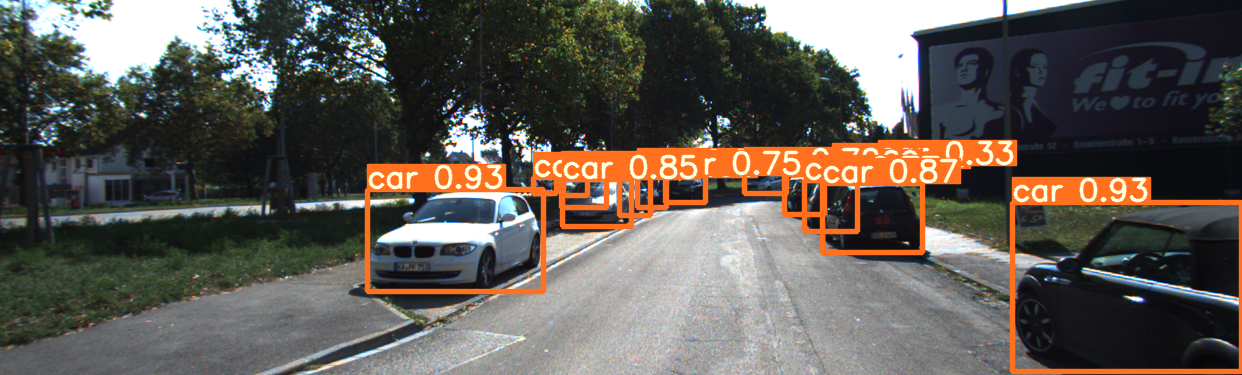

In [12]:
Image(filename=('/kaggle/working/yolov5/runs/detect/exp/000010.png'), width=600)

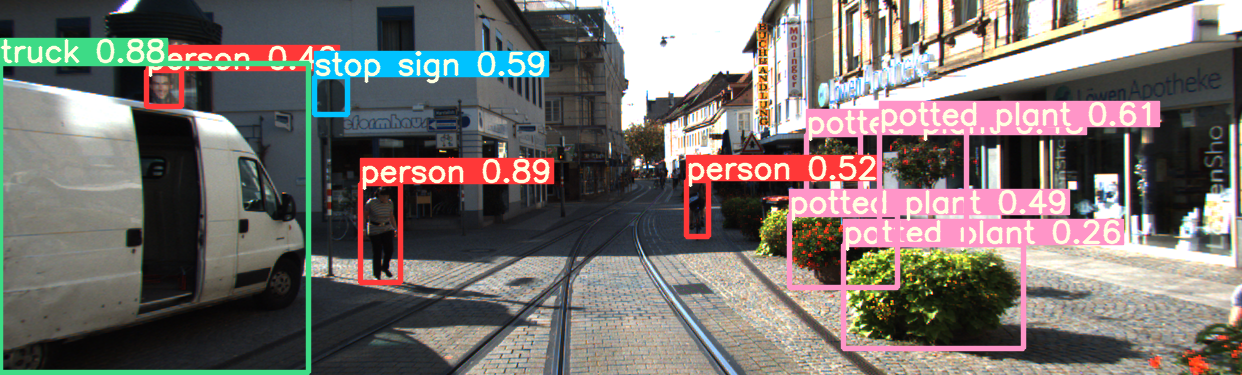

In [14]:
Image(filename=('/kaggle/working/yolov5/runs/detect/exp4/000100.png'), width=600)

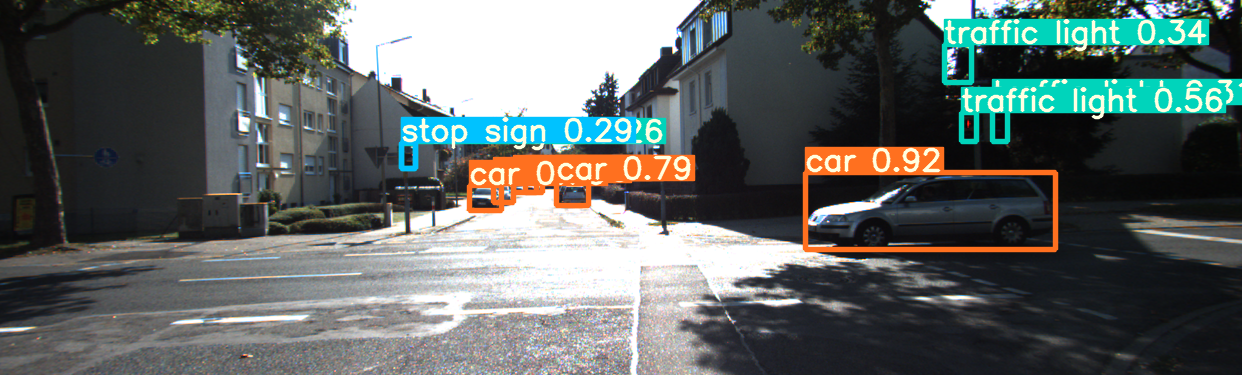

In [10]:
Image(filename=('/kaggle/working/yolov5/runs/detect/exp2/001000.png'), width=600)

In [ ]:
Image(filename=('/kaggle/working/yolov5/runs/detect/exp/007000.png'), width=600)

### 检测视频

In [ ]:
%ls

In [ ]:
!python detect.py --weights yolov5x.pt --img 640 --conf 0.25 --source data/1.mp4

In [ ]:
!python detect.py --weights yolov5x.pt --img 640 --conf 0.25 --source data/2.mp4

In [ ]:
!python detect.py --weights yolov5x.pt --img 640 --conf 0.25 --source data/3.mp4